# MarlimR3D - Sections and Survey

In [1]:
import discretize
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# Model domain

## Load resistivity cubes

The create the data file you first have to run (once) the following code in the directory `model-marlim/.`:

```
import loadmarlim
loadmarlim.extract_sections()
```

In [33]:
with np.load('marlim_sections.npz') as d:
    res_h = d['res_h']
    res_v = d['res_v']

    mesh = discretize.TensorMesh([d['hx'], d['hy'], d['hz']], x0=d['x0'])
mesh

TensorMesh: 1,256,038 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x   1022    376,230.90    401,780.90     25.00     25.00    1.00
   y      1  7,517,807.00  7,517,817.00     10.00     10.00    1.00
   z   1229     -6,145.00          0.00      5.00      5.00    1.00

<IPython.core.display.Javascript object>


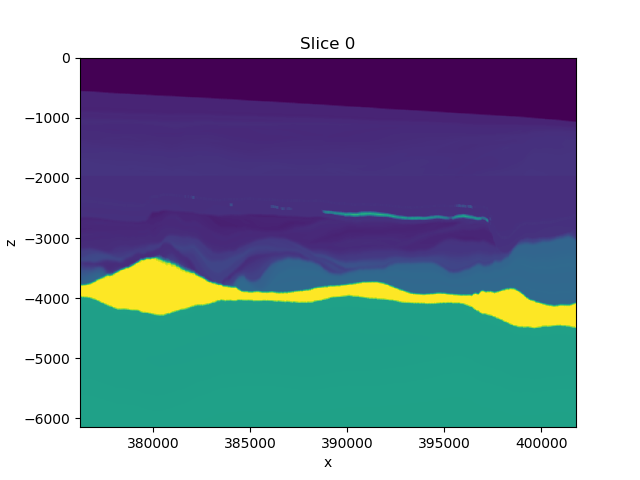

(<matplotlib.collections.QuadMesh at 0x7fc90c073a90>,)

In [50]:
mesh.plotSlice(np.log10(res_h), normal='Y', clim=[np.log10(0.5), np.log10(1000)])

# CSEM data

In [51]:
data = xr.load_dataset('marlim_data.nc', engine='h5netcdf')

## Plot survey

<IPython.core.display.Javascript object>


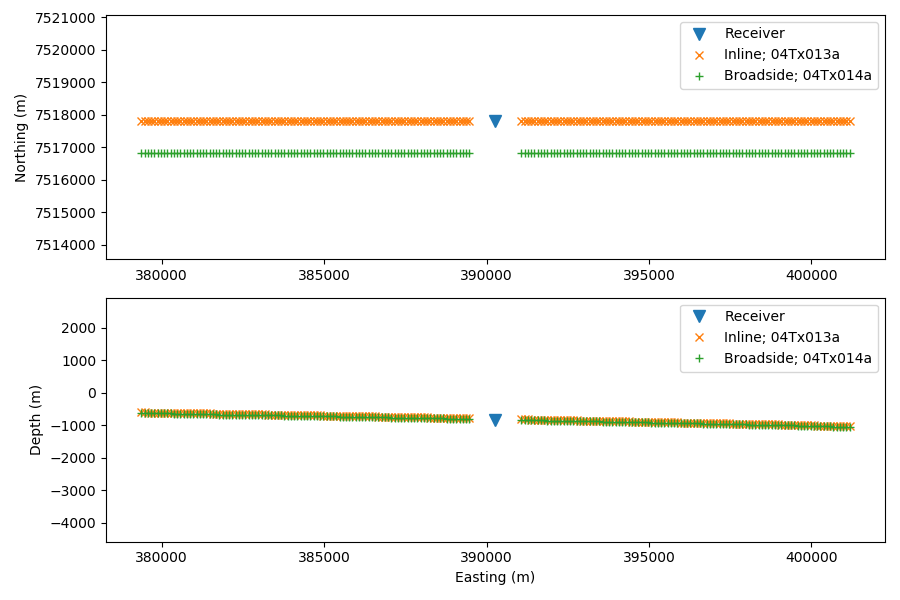

In [8]:
plt.figure(figsize=(9, 6))

ax1 = plt.subplot(211)
plt.plot(data.attrs['rec_x'], data.attrs['rec_y'], 'v', ms=8, label='Receiver')
plt.plot(data.src_x, np.ones(data.src_x.size)*data.data_il_re.attrs['src_y'],
         'x', label=f"Inline; {data.data_il_re.attrs['lineid']}")
plt.plot(data.src_x, np.ones(data.src_x.size)*data.data_bs_re.attrs['src_y'],
         '+', label=f"Broadside; {data.data_bs_re.attrs['lineid']}")
plt.legend()
plt.axis('equal')
plt.ylabel('Northing (m)')

plt.subplot(212, sharex=ax1)
plt.plot(data.attrs['rec_x'], data.attrs['rec_z'], 'v', ms=8, label='Receiver')
plt.plot(data.src_x, data.data_il_re.attrs['src_z'],
         'x', label=f"Inline; {data.data_il_re.attrs['lineid']}")
plt.plot(data.src_x, data.data_bs_re.attrs['src_z'],
         '+', label=f"Broadside; {data.data_bs_re.attrs['lineid']}")
plt.legend()
plt.axis('equal')
plt.xlabel('Easting (m)')
plt.ylabel('Depth (m)')

plt.tight_layout()
plt.show()

In [10]:
# Print Version Info (segyio is used in <loadmarlim.py>)
import scooby
scooby.Report([xr, 'scooby', discretize])

--------------------------------------------------------------------------------
  Date: Fri Mar 20 11:07:25 2020 CET

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GB
       Environment : Jupyter

  Python 3.7.6 (default, Jan  8 2020, 19:59:22)  [GCC 7.3.0]

            xarray : 0.15.0
            scooby : 0.5.2
        discretize : 0.4.10
             numpy : 1.15.4
             scipy : 1.4.1
           IPython : 7.13.0
        matplotlib : 3.1.3
--------------------------------------------------------------------------------